## Imports

In [19]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
#from utils.plotter import plot_SVM_DecisionBoundary
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, f1_score
from pandas.api.types import CategoricalDtype
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

## Confusion Matrix Function

In [20]:
# Plot Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title,fontsize =17)
    plt.ylabel('True label',fontsize =14)
    plt.xlabel('Predicted label',fontsize =14)
    plt.yticks(fontsize =10)
    plt.xticks(fontsize =10)


## Count Races Function

In [21]:
# Count races
def countRaces(race_counts_df,attribute=True):
    
    whites_count = 0
    blacks_count = 0
    asian_count = 0
    hispanic_count = 0
    other_count = 0
    
    if(attribute==True):
        for i in race_counts_df['ethnicity']:
            if (i == 'white')|(i == 0):
                whites_count = whites_count+1
            if (i == 'black')|(i == 1):
                blacks_count = blacks_count+1
            if (i == 'asian')|(i == 2):
                asian_count = asian_count+1
            if (i == 'hispanic')|(i == 3):
                hispanic_count = hispanic_count+1
            if (i == 'other')|(i == 4):
                other_count = other_count+1
    if(attribute==False):
        for i in race_counts_df:
            if (i == 'white')|(i == 0):
                whites_count = whites_count+1
            if (i == 'black')|(i == 1):
                blacks_count = blacks_count+1
            if (i == 'asian')|(i == 2):
                asian_count = asian_count+1
            if (i == 'hispanic')|(i == 3):
                hispanic_count = hispanic_count+1
            if (i == 'other')|(i == 4):
                other_count = other_count+1

    print("Whites: {}".format(whites_count))
    print("Blacks: {}".format(blacks_count)) 
    print("Asians: {}".format(asian_count))
    print("Hispanics: {}".format(hispanic_count))
    print("Other: {}".format(other_count))

## Load csvs

In [22]:
path_counts_ran = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv'
path_users_ran = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'
counts_df_ran = pd.read_csv(path_counts_ran,index_col=None, header=0, low_memory = False)
users_df_ran = pd.read_csv(path_users_ran,index_col=None, header=0, low_memory = False)

path_counts_lon = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/london_per_user_emoji_counts.csv'
path_users_lon = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'
counts_df_lon = pd.read_csv(path_counts_lon,index_col=None, header=0, low_memory = False)
users_df_lon = pd.read_csv(path_users_lon,index_col=None, header=0, low_memory = False)

path_counts_joh = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/joh_per_user_emoji_counts.csv'
path_users_joh = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'
counts_df_joh = pd.read_csv(path_counts_joh,index_col=None, header=0, low_memory = False)
users_df_joh = pd.read_csv(path_users_joh,index_col=None, header=0, low_memory = False)

path_counts_nyc = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/nyc_per_user_emoji_counts.csv'
path_users_nyc = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'
counts_df_nyc = pd.read_csv(path_counts_nyc,index_col=None, header=0, low_memory = False)
users_df_nyc = pd.read_csv(path_users_nyc,index_col=None, header=0, low_memory = False)

In [23]:
# Append counts from all Locations
counts = counts_df_ran.append(counts_df_lon, sort=False,ignore_index=True).append(counts_df_joh, sort=False,ignore_index=True).append(counts_df_nyc, sort=False,ignore_index=True)
print(counts.shape)

# Append users from all Locations
users = users_df_ran.append(users_df_lon, sort=False,ignore_index=True).append(users_df_joh, sort=False,ignore_index=True).append(users_df_nyc, sort=False,ignore_index=True)
print(users.shape)

# Fill NaN with 0.0
counts = counts.fillna(0.0)

(40000, 2579)
(40000, 28)


In [24]:
del counts_df_ran
del counts_df_lon
del counts_df_joh
del counts_df_nyc

# Preview counts
counts.describe()

👨🏿‍🔬         🚵🏽‍♂️          👨🏾‍🎤          👩🏾‍🏫         🙍🏽‍♂️  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.000025      0.000050      0.000225      0.000300      0.000225   
std        0.005000      0.007071      0.035707      0.031622      0.022912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      7.000000      5.000000      3.000000   

                 🇮🇨        👳🏾‍♀️        👨🏾‍🏫           🦠         💂🏻‍♀️  ...  \
count  40000.000000  40000.00000  40000.0000  40000.0000  40000.000000  ...   
mean       0.000075      0.00020      0.0001      0.0001      0.000050  ...   
std        0.011180      0.01581      0.0100      0.0100      0.007071  ...   
min        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
25%        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
50%        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
75%        0.000000      0.00000      0.0000      0.0000      0.000000  ...   
max        2.000000      2.00000      1.0000      1.0000      1.000000  ...   

              🧗🏻‍♂️          👩🏾‍🚒          👩🏿‍🎨         👨🏿‍✈️            👰🏿  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.000050      0.000075      0.000100      0.000100      0.000125   
std        0.007071      0.015000      0.015811      0.015811      0.018028   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      3.000000      3.000000      3.000000      3.000000   

            ⛹🏿‍♂️       🤹🏽‍♂️         🧜🏿‍♂️            🇵🇲           🇬🇺  
count  40000.0000  40000.0000  40000.000000  40000.000000  40000.00000  
mean       0.0002      0.0002      0.000225      0.000075      0.00005  
std        0.0400      0.0400      0.045000      0.015000      0.01000  
min        0.0000      0.0000      0.000000      0.000000      0.00000  
25%        0.0000      0.0000      0.000000      0.000000      0.00000  
50%        0.0000      0.0000      0.000000      0.000000      0.00000  
75%        0.0000      0.0000      0.000000      0.000000      0.00000  
max        8.0000      8.0000      9.000000      3.000000      2.00000  

[8 rows x 2579 columns]

## % Feuture representation

In [25]:
# Feature % representation
for index, row in counts.iterrows():
    counts.loc[index] = counts.loc[index]/counts.loc[index].sum()
counts.describe()

👨🏿‍🔬         🚵🏽‍♂️          👨🏾‍🎤          👩🏾‍🏫         🙍🏽‍♂️  \
count  2.722600e+04  2.722600e+04  27226.000000  27226.000000  2.722600e+04   
mean   2.836262e-08  1.853382e-07      0.000004      0.000001  4.870087e-07   
std    4.679919e-06  2.930671e-05      0.000589      0.000101  3.824005e-05   
min    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
25%    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
50%    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
75%    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
max    7.722008e-04  4.830918e-03      0.097222      0.012594  3.984064e-03   

                 🇮🇨         👳🏾‍♀️          👨🏾‍🏫             🦠         💂🏻‍♀️  \
count  2.722600e+04  2.722600e+04  2.722600e+04  27226.000000  2.722600e+04   
mean   1.662974e-07  3.372688e-07  6.847104e-07      0.000001  4.770146e-07   
std    1.959546e-05  2.310104e-05  7.042348e-05      0.000108  7.168357e-05   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
max    2.583979e-03  2.403846e-03  8.474576e-03      0.013699  1.176471e-02   

       ...         🧗🏻‍♂️          👩🏾‍🚒          👩🏿‍🎨         👨🏿‍✈️  \
count  ...  2.722600e+04  2.722600e+04  27226.000000  2.722600e+04   
mean   ...  3.034764e-07  2.123098e-07      0.000001  7.417875e-07   
std    ...  4.115603e-05  3.503176e-05      0.000146  1.045872e-04   
min    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
75%    ...  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
max    ...  6.578947e-03  5.780347e-03      0.023438  1.694915e-02   

                 👰🏿         ⛹🏿‍♂️         🤹🏽‍♂️         🧜🏿‍♂️            🇵🇲  \
count  27226.000000  27226.000000  2.722600e+04  27226.000000  2.722600e+04   
mean       0.000004      0.000007  4.848792e-07      0.000001  7.395221e-07   
std        0.000638      0.001128  8.000653e-05      0.000192  1.220234e-04   
min        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
25%        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
50%        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
75%        0.000000      0.000000  0.000000e+00      0.000000  0.000000e+00   
max        0.105263      0.186047  1.320132e-02      0.031690  2.013423e-02   

                 🇬🇺  
count  2.722600e+04  
mean   1.958912e-07  
std    3.232264e-05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    5.333333e-03  

[8 rows x 2579 columns]

In [26]:
users.columns.unique()

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'ethnicity', 'ethnicity:confidence', 'gender',
       'gender:confidence', 'reason_not_valid', 'reason_not_valid:confidence',
       'valid_photo', 'valid_photo:confidence',
       'which_icon_most_closely_matches_the_persons_skin_tone',
       'which_icon_most_closely_matches_the_persons_skin_tone:confidence',
       'ethnicity_gold', 'gender_gold', 'image_url', 'reason_not_valid_gold',
       'user_id', 'valid_photo_gold',
       'which_icon_most_closely_matches_the_persons_skin_tone_gold',
       'orig__golden', 'ethnicity_gold_reason', 'gender_gold_reason',
       'reason_not_valid_gold_reason', 'valid_photo_gold_reason',
       'which_icon_most_closely_matches_the_persons_skin_tone_gold_reason'],
      dtype='object')

## Add race labels

In [27]:
# Add ethnicity column
race_counts_df = counts 
race_counts_df['ethnicity'] = users['ethnicity']
#race_counts_df['ethnicity:confidence'] = users['ethnicity:confidence']
race_counts_df = race_counts_df.dropna()

In [28]:
# Drop ethnicities lower than 95% confidence

#race_counts_df = race_counts_df[race_counts_df['ethnicity:confidence'] > 0.95]

In [29]:
race_counts_df['ethnicity'].unique()

array(['asian', 'white', 'hispanic', 'black', 'other'], dtype=object)

In [30]:
countRaces(race_counts_df)

Whites: 7047
Blacks: 6161
Asians: 780
Hispanics: 328
Other: 25


In [31]:
# Drop 'other' ethnicity
race_counts_df = race_counts_df[race_counts_df.ethnicity != 'other']
# Preview counts with ethnicity labels
countRaces(race_counts_df)

Whites: 7047
Blacks: 6161
Asians: 780
Hispanics: 328
Other: 0


In [32]:
# Whites -> 0
# Blacks -> 1
# Asians -> 2
# Hispanics -> 3
race_counts_df = race_counts_df.replace('white', 0)
race_counts_df = race_counts_df.replace('black', 1)
race_counts_df = race_counts_df.replace('asian', 2)
race_counts_df = race_counts_df.replace('hispanic', 3)
race_counts_df['ethnicity'].unique()


array([2, 0, 3, 1])

In [33]:
race_counts_df=race_counts_df.reset_index(drop=True)
#race_counts_df.drop(columns=['ethnicity:confidence'])

## Split into test and train & Oversample

In [34]:
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(race_counts_df.drop(columns=['ethnicity']), race_counts_df['ethnicity'], test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto',random_state=42,k_neighbors=4)
X_train_race, y_train_race = smote.fit_resample(X_train_race, y_train_race)

##del race_counts_df

In [35]:
countRaces(y_train_race,attribute=False)
countRaces(y_test_race,attribute=False)

Whites: 5600
Blacks: 5600
Asians: 5600
Hispanics: 5600
Other: 0
Whites: 1447
Blacks: 1199
Asians: 149
Hispanics: 69
Other: 0


## Linear SVM 

In [38]:
# Use Cross-Validation on the Training set(5-fold split)
k_fold_5 = KFold(n_splits=5, shuffle=True, random_state=0)

#List of Cs
C_list_6 = np.logspace(start = -2 ,stop=3,num=6)
score_array_6=[]

# Per c in list of Cs
for i,c in enumerate(C_list_6):
    clf_temp = LinearSVC(random_state=0, tol=1e-5,C=c)
    score_temp = cross_val_score(clf_temp,X_train_race,y_train_race,cv=k_fold_5, scoring='accuracy', n_jobs=-1)
    # Update score array
    score_array_6.append(score_temp.mean())
score_array_6

[0.5305357142857143,
 0.6219196428571429,
 0.6960714285714286,
 0.7504017857142857,
 0.7862500000000001,
 0.7233482142857143]

In [43]:
best_C = C_list_6[np.argmax(score_array_6)]
best_C

100.0

Accuracy score with Linear SVM on train set: 0.827
Accuracy score with Linear SVM on test set: 0.680



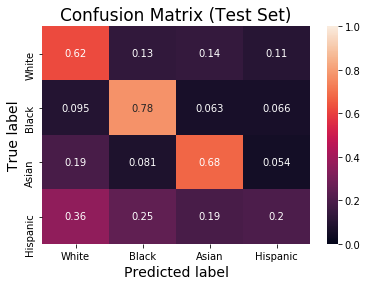

In [46]:
clf = LinearSVC(random_state=0, tol=1e-5,C=best_C,max_iter=30000).fit(X_train_race, y_train_race)

# Train Data
predict_train_clf  = clf.predict(X_train_race)
accuracy_train_clf = accuracy_score(y_train_race, predict_train_clf)

# Test Data
predict_val_clf  = clf.predict(X_test_race)
accuracy_val_clf = accuracy_score(y_test_race, predict_val_clf)

# Report
print('Accuracy score with Linear SVM on train set: {:.3f}'.format(accuracy_train_clf))
print('Accuracy score with Linear SVM on test set: {:.3f}\n'.format(accuracy_val_clf))

# Confusion matrix
cm = confusion_matrix(y_test_race,predict_val_clf)

# Normalise Confusion Matrix
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm,classes=['White','Black','Asian','Hispanic'],title="Confusion Matrix (Test Set)")